## Introduction

The body fat percentage (BFP) of a human or other living being is the total mass of fat divided by total body mass, multiplied by 100. It is a measure of fitness level, since it is the only body measurement which directly calculates a person's relative body composition without regard to height or weight. While the body fat percentage plays an important role in various health outcomes such as life expectancy, prognosis for disease, healthcare costs, and the general well-being of individuals, it is quite difficult and costly to calculate: one of the more accurate methods requires underwater weighing. Thus, it is very practical to come up with a simple, accurate and precise method to estimate body fat percentage. 

We can use multiple regression to determine the prediction equations for the determination of body fat percentage. Since the data set contains various body measurements and an accurate estimate of the percentage of body fat from Siri's equation, body fat percentage can be fit to the other measurements using multiple regression, giving a useful predictive equation for doctor to estimate people's body fat percentage. The various measurements other than body fat  are ones that are easy to obtain and serve as proxies for body fat, which is not so easily obtained.

## Background about the data

The data set we used to analyze contains age, weight, height and 10 circumference measurements on 252 men. Each man's percentage of body fat was accurately estimated by an underwater weighing technique. 

## Select Response Variable

According to the Siri formular $100B=\frac{495}{D}-450$, there should be a linear relationship between the two variables BODYFAT and DENSITY. Hence, we might first draw a plot, where the x axis would be the inverse of the 'DENSITY', y axis would be BODYFAT, and check if the collected data seriously follow this formula.

In [175]:
setwd("~/Desktop/STAT628/Module2")
fat=read.csv("BodyFat.csv")
fat=fat[,-1]
fatnew=fat

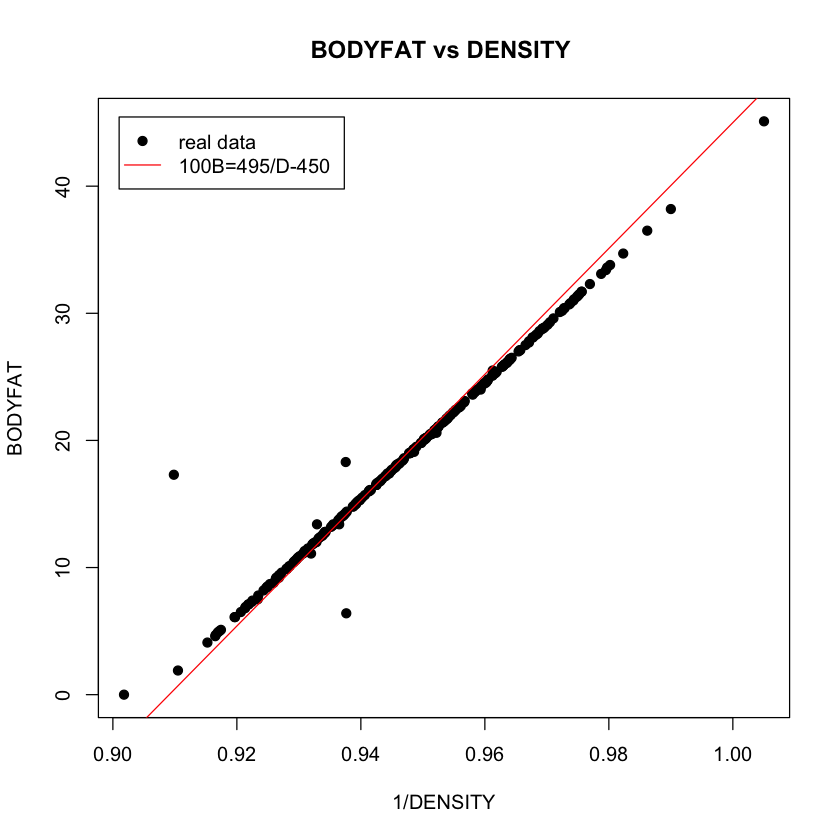

In [176]:
plot(1/(fat$DENSITY),fat$BODYFAT,main="BODYFAT vs DENSITY ",xlab="1/DENSITY",ylab="BODYFAT",pch=19)
abline(b=495,a=-450,col="red")
legend(inset=0.03,"topleft",c("real data","100B=495/D-450"),pch=c(19,NA),lty=c(NA,1),col=c("black","red"))

From the plot shown above, the points are almost on the formula expression line, and therefore we could consider choosing one of these two variables to be the response variable for later constucting linear regression model because they can be expressed by each other. Given the convinence of getting body fat directly, BODYFAT could be the response variable.

## Data preprossessing

To begin with, we delete the DENSITY column because we won't use it in the linear regression model construction. 

In [177]:
fatnew=fat[,-2]
head(fatnew)
tail(fatnew)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
247,29.1,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,11.5,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,32.3,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,28.3,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,25.3,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,30.7,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


Next we need to detect the abnormal data points and analyze their reasons for existence. If it's clearly data error we should delete those observations or use imputation methods to deal with them. 

In [178]:
summary(fat)

    BODYFAT         DENSITY           AGE            WEIGHT     
 Min.   : 0.00   Min.   :0.995   Min.   :22.00   Min.   :118.5  
 1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75   1st Qu.:159.0  
 Median :19.00   Median :1.055   Median :43.00   Median :176.5  
 Mean   :18.94   Mean   :1.056   Mean   :44.88   Mean   :178.9  
 3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00   3rd Qu.:197.0  
 Max.   :45.10   Max.   :1.109   Max.   :81.00   Max.   :363.1  
     HEIGHT        ADIPOSITY          NECK           CHEST       
 Min.   :29.50   Min.   :18.10   Min.   :31.10   Min.   : 79.30  
 1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35  
 Median :70.00   Median :25.05   Median :38.00   Median : 99.65  
 Mean   :70.15   Mean   :25.44   Mean   :37.99   Mean   :100.82  
 3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38  
 Max.   :77.75   Max.   :48.90   Max.   :51.20   Max.   :136.20  
    ABDOMEN            HIP            THIGH            KNEE      
 Min.   : 69.40  

We found the there are some abnormal observations. The smallest body fat is 0 which must be 
an error and this could be handled by computing from the siri formula. The smallest density is 
0.995 smaller than 1 the density of water,which we could find the observation and analyze it. 
The smallest height of the observations is 29.50 which is so small.Therefore we need first dealwith these 3 most abnormal observation and adjust the dataset.

Firstly,we could find these abnormal obsevations.

In [179]:
index1=which.min(fat$BODYFAT)
index1
index2=which.min(fat$DENSITY)
index2
index3=which.min(fat$HEIGHT)
index3

[1] 182

[1] 216

[1] 42

In [180]:
fat_abnorm=fat[c(index1,index2,index3),]
fat_abnorm

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,0.0,1.1089,40,118.5,68.0,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
216,45.1,0.9950,51,219.0,64.0,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
42,31.7,1.0250,44,205.0,29.5,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


We found the 216th observation is very fat so the data is convincing. Since we won't use the density of it, this observation doesn't need any adjustment to it. However, the 182th observation needs to compute the body fat proportion from the siri formula. 

As for observation 42, its height is 29.50 inch, but his age is 44 years old and weights 205 pounds, there must be an error here with the height because all the other features seem quite normal. We consider impute it according to the BMI calculation, $bmi=weight/height^2$.Because $weight=205~pounds =0.4535924\times205 kg=92.98644 kg$, $height=\sqrt{\frac{weight}{bmi}}=\sqrt{\frac{92.98644}{29.9}}=1.763495m=69.42893inch =69.5inch$. 

Interestingly, we find observation 182 BODYFAT is 0,there must be an error here.According to siri formula, we could then compute his $BODYFAT=495/1.1089-450=-3.611687<0$. Therefore we might delete it.


In [181]:
fatnew[42,"HEIGHT"]=69.5
fatnew=fatnew[-182,]

To identify the outliers, we could first fit the regression line with all observations and then use 1)Leverage 2)DFFITS  3)Cook’s distance  4)DFBETAS methods to find the influential points of the model. That is to say, for those observations, drop them from the model will lead to significant difference to the model changing and therefore are likely to be outliers.

The criteron for each plot would be 
For Leverage should be greater than 2p/n. For Cook's distance should be 4/(n-p) as well as the F statistic could be greater than $F_{0.5,p,n-p}$. For DFBETAS could be $\pm -2/{\sqrt{n}}$ , source: Regression Analysis | Chapter 6 | Diagnostic for Leverage and Influence | Shalabh, IIT Kanpur

In [182]:
fit=lm(BODYFAT~.,data=fatnew)

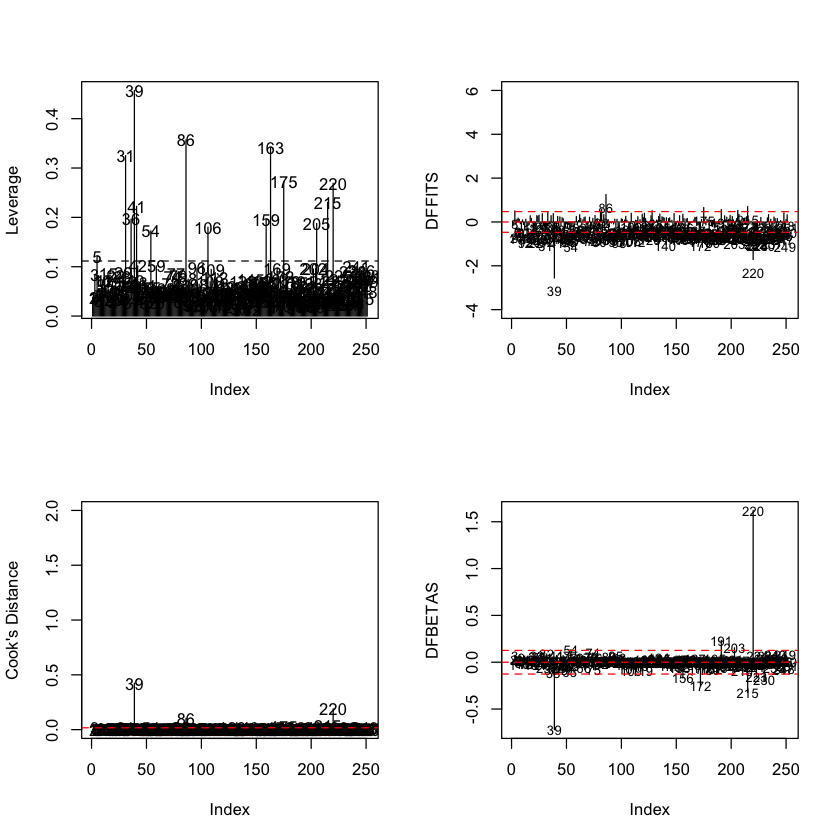

In [183]:
par(mfrow=c(2,2))
## leverage 
p=14;n=251;
lm.hats = hatvalues(fit)
plot(lm.hats, type = "h", ylab = "Leverage") 
text(lm.hats, labels = 1:n) 
abline(h=2*p/n, lty = 2) 

## DFFITS

lm.dffits = dffits(fit)
plot(lm.dffits, type = "h", ylab = "DFFITS", ylim = c(-4,6)) 
text(lm.dffits, labels = 1:n, cex = 0.8, pos = 1)
abline(h = c(-2*sqrt(p/n), 0, 2*sqrt(p/n)), col="red",lty = 2) 

## cook's distance
lm.cooksD = cooks.distance(fit)
plot(lm.cooksD, type = "h", ylab="Cook's Distance",ylim=c(0,2)) 
text(lm.cooksD, labels = 1:n)
abline(h=4/(n-p),col="red",lty=2)

## dfbetas
lm.dfbetas = dfbetas(fit)
plot(lm.dfbetas[,1], type = "h", ylab = "DFBETAS", xlab = "Index") 
text(lm.dfbetas[,1], labels = 1:n, cex = 0.8)
abline(h=c(-2/sqrt(n), 0, 2/sqrt(n)), lty = 2,col="red") 

From the four plots shown above, we identify observation 39 is obvious influential points. We select this observation.


In [184]:
fatnew[39,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


For observation 39 the subject weights 363 pounds which is very abnormal and all the other features are also quite big for instance the hip, chest, abdomen circumstances. We consider delete it. 

In [185]:
fatnew=fatnew[-39,]


After data preprossessing, we fit the linear regression model again and diagnose the cook's distance plot.

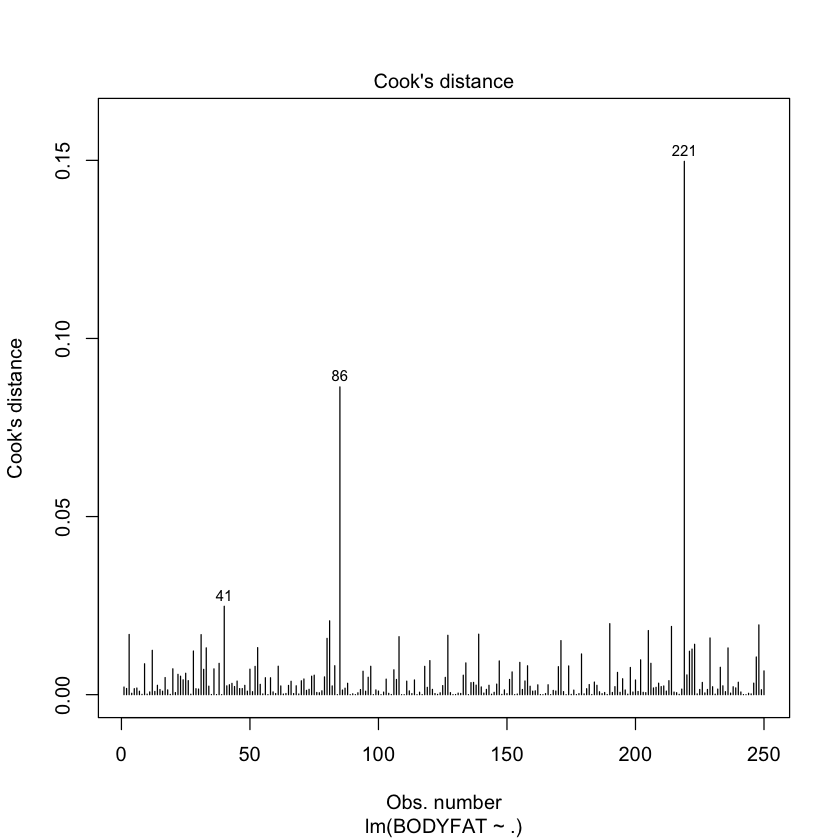

In [186]:
fit2=lm(BODYFAT~.,data=fatnew)
plot(fit2,which=4)

From the cook's distance plot because all the cook's distance are much smaller than 1 and therefore we could consider after data processing there aren't obvious influential and abnormal points.

##  Compute VIF and choose suitable explanatory variable.

To determine which explanatory variables I need to construct the regression model, first I calculate the
variance inflation factors of each $𝑋_k$, k=1,2,3,...14. A rule of thumb is that if the mean variance inflation
factor is greater than 1, then there might exist multicollinearity. For each inflation factor 𝑉𝐼𝐹 , if it’s 
greater than 10, the multicollinearity might have a significant influence. In this dataset, by using the “vif” function in R’s “car” package.We may gain 𝑉𝐼𝐹 shown below.

In [187]:
library(car)
vif(fit2)
mean(vif(fit2))

AGE     WEIGHT     HEIGHT  ADIPOSITY       NECK      CHEST    ABDOMEN 
  2.254707 124.943537  28.580540  92.764297   3.917914  11.077025  12.218147 
       HIP      THIGH       KNEE      ANKLE     BICEPS    FOREARM      WRIST 
 12.259825   7.203546   4.409214   1.830273   3.390589   2.417807   3.196378

[1] 22.17599

Because mean vif is 22.1759855660162 greater than 1. Hence, there might be the multicollinearity problem. From the table of 𝑉𝐼𝐹 s shown above, we could identify the individual factor VIF of WEIGHT,HEIGHT and ADIPOSITY are much greater than 10, which indicates that multicollinearity may have a large impact on the inference.

## Perform Model Selection

Next, in order to reduce multicollinearity, we need to reduce the model parameters. There are four famous criteron to select the predictor variables. The R^2 criterion, adjusted R^2 criterion, Mallow’s Cp criterion, BIC/AIC criterion. The smaller Cp,BIC/AIC and the bigger adjusted R^2 criterion and R^2, the better the performance of the model fitting.
I first use the "regsubset" function in R's "leaps" package to gain the best selection model with each best selection size 1 and selection among maximum size 14 of subsets to be examined.


In [188]:
library(leaps)
a=regsubsets(x=fatnew[,-1],y=fatnew[,1],nvmax=14)
b=summary(a)
mat=cbind(b$which,b$rsq,b$adjr2,b$cp,b$bic)
dimnames(mat)[[2]]=c(dimnames(b$which)[[2]],"rsq","adjr2", "cp", "bic")
round(mat,4)

(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,adjr2,cp,bic
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6742,0.6729,60.0970,-269.3042
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7192,0.7170,19.7687,-300.9901
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7314,0.7282,10.3061,-306.5760
1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7365,0.7322,7.5748,-305.7871
1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0.7396,0.7343,6.6027,-303.2850
1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0.7423,0.7360,6.0797,-300.3557
1,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0.7444,0.7371,6.0776,-296.9104
1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0.7462,0.7378,6.3888,-293.1537
1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,0.7473,0.7379,7.3513,-288.7226
1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,0.7483,0.7378,8.4462,-284.1563


From the table shown above, we could identify that when 2 variables are selected based on the exhaustive search, the change of $R^2$, adjusted $R^2$, $C_p$ and $BIC$ is the largest, indicating that select two variables would be enough to construct a suitable model. Based on the "rugsubset" function, the model is $BODYFAT\sim WEIGHT+ABDOMEN$.

Next we would use t test to check the significance of the coefficients.

In [189]:
fit_bic=lm(BODYFAT~WEIGHT+ABDOMEN,data=fatnew)
summary(fit_bic)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN, data = fatnew)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0864  -2.9464  -0.1188   2.9558   9.8830 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.50150    2.45776 -17.293  < 2e-16 ***
WEIGHT       -0.12324    0.01957  -6.296 1.39e-09 ***
ABDOMEN       0.90283    0.05182  17.422  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.06 on 247 degrees of freedom
Multiple R-squared:  0.7192,	Adjusted R-squared:  0.717 
F-statistic: 316.4 on 2 and 247 DF,  p-value: < 2.2e-16


Because the p value of both the 2 variables amuch smaller than 0.05 and therefore the coefficients are significant. The model is effective.

Then I use the $“step”$ function in R and $BIC$ criterion.The reason that I choose $BIC$ criterion is that $AIC$ will tend to overfitting. The direction of this process is “both” instead of exhaustive search we implemented before, which means we either add or delete the explanatory variable and compare $BIC$ among them and choose the smallest $BIC$ to gain the best model fitting explanatory variables. The result after a number of steps of choosing is shown below.

In [190]:
fit2=lm(BODYFAT~.,data=fatnew)
n=length(fatnew)
step(fit2,direction="both",trace=2,k=log(n))

Start:  AIC=709.3
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.98 3628.0 706.65
- HEIGHT     1      1.84 3628.8 706.71
- ANKLE      1      6.68 3633.7 707.05
- WEIGHT     1      9.32 3636.3 707.23
- ADIPOSITY  1     12.27 3639.3 707.43
- BICEPS     1     15.53 3642.5 707.66
- THIGH      1     21.05 3648.0 708.03
- FOREARM    1     22.82 3649.8 708.16
- HIP        1     23.50 3650.5 708.20
- CHEST      1     32.61 3659.6 708.83
<none>                   3627.0 709.30
- NECK       1     43.26 3670.3 709.55
- AGE        1     81.58 3708.6 712.15
- WRIST      1    184.48 3811.5 718.99
- ABDOMEN    1   1406.76 5033.8 788.53

Step:  AIC=706.65
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- HEIGHT     1      1.78 3629.7 704.07
-


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + CHEST + ABDOMEN + WRIST, 
    data = fatnew)

Coefficients:
(Intercept)          AGE    ADIPOSITY        CHEST      ABDOMEN        WRIST  
   -2.56583      0.07976      0.54033     -0.22324      0.70521     -2.11010  


In [191]:
fit_bic2=lm(BODYFAT ~ AGE + ADIPOSITY + CHEST + ABDOMEN + WRIST, data = fatnew)
summary(fit_bic2)



Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + CHEST + ABDOMEN + WRIST, 
    data = fatnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5416 -2.7194 -0.2477  3.0473  8.8029 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.56583    5.63576  -0.455 0.649316    
AGE          0.07976    0.02121   3.761 0.000212 ***
ADIPOSITY    0.54033    0.21825   2.476 0.013978 *  
CHEST       -0.22324    0.08682  -2.571 0.010729 *  
ABDOMEN      0.70521    0.07101   9.931  < 2e-16 ***
WRIST       -2.11010    0.36002  -5.861 1.48e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.944 on 244 degrees of freedom
Multiple R-squared:  0.7382,	Adjusted R-squared:  0.7328 
F-statistic: 137.6 on 5 and 244 DF,  p-value: < 2.2e-16


The predictors are all significant and this model could also be a suitable one. Conclusively we have 2 candidates. The first with the exhastive search and the model is $BODYFAT ~ WEIGHT + ABDOMEN$. The second with the both direction stepwise and $BIC$ criterion, and the model is $BODYFAT ~ AGE + ADIPOSITY + CHEST + ABDOMEN + WRIST$. We could calculate the $BIC$ of these 2 and chose the smallest one.

In [192]:
BIC(fit_bic)
BIC(fit_bic2)

[1] 1429.101

[1] 1428.188

The BIC of the exhaustive search and for the stepwise search are quite similar. Considering the siplicity, we choose the model: $$BODYFAT \sim WEIGHT+ABDOMEN$$

## Check Model Assumptions 

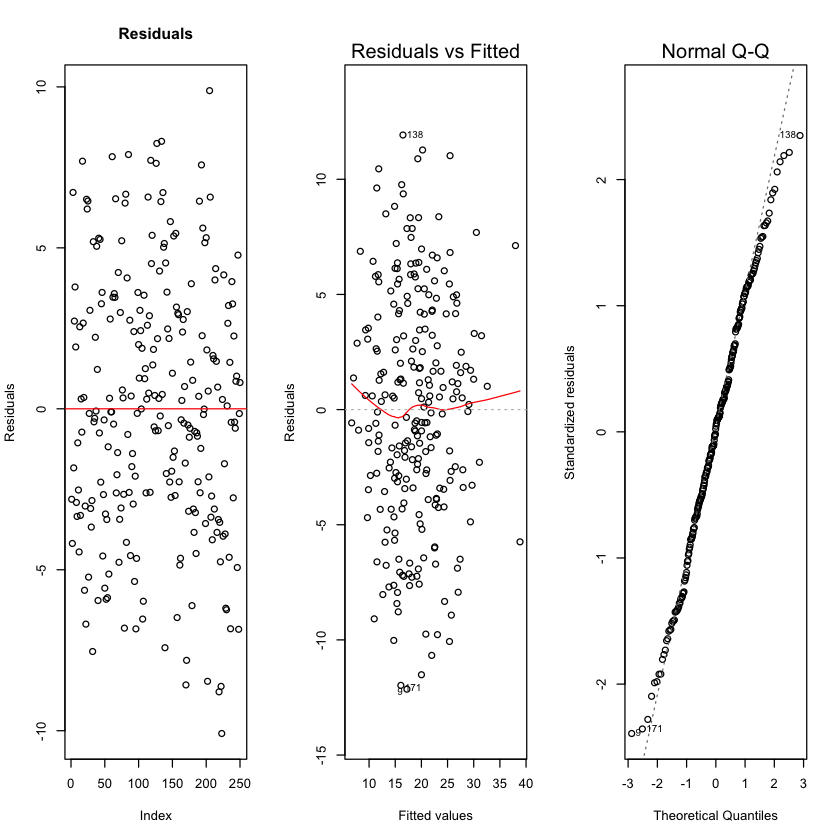

In [193]:
par(mfrow=c(1,3))
plot(residuals(fit_bic),main="Residuals",ylab="Residuals")
abline(h=0,col="red")
plot(fit_lnbmi, which= c(1,2))


From the plot shown above, for Resudals vs Index plot both of them are patternless and therefore satisfy the independence. For Residuals vs Fitted plot, the vertical distance from the points to x axis are both nearly constant and patternless and therefore satisfying the homoscedasticity. For the $Normal~Q-Q~plot$ the residual points of both models are almost in a line and thus the normality assumption should not be violated. 

## Bodyfat and BMI

Many materials have talked about relationships between $BODYFAT$ and $BMI$, like Terence C. Mills provides a semi-logarithmic relation between bodyfat and BMI, and $BMI$ is much easier to measure than $ABDOMEN$.

Thus, we consider to use $lnBMI$ to make our model much easily to achieve.

Firstly, we explore the relation between $BODYFAT$ and $lnBMI$.   

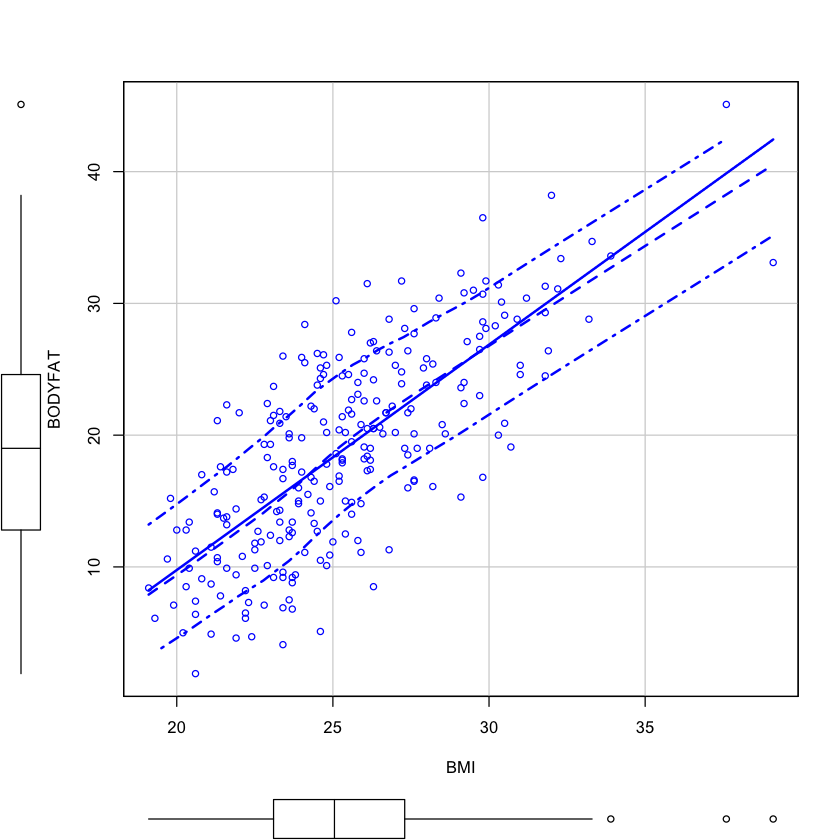

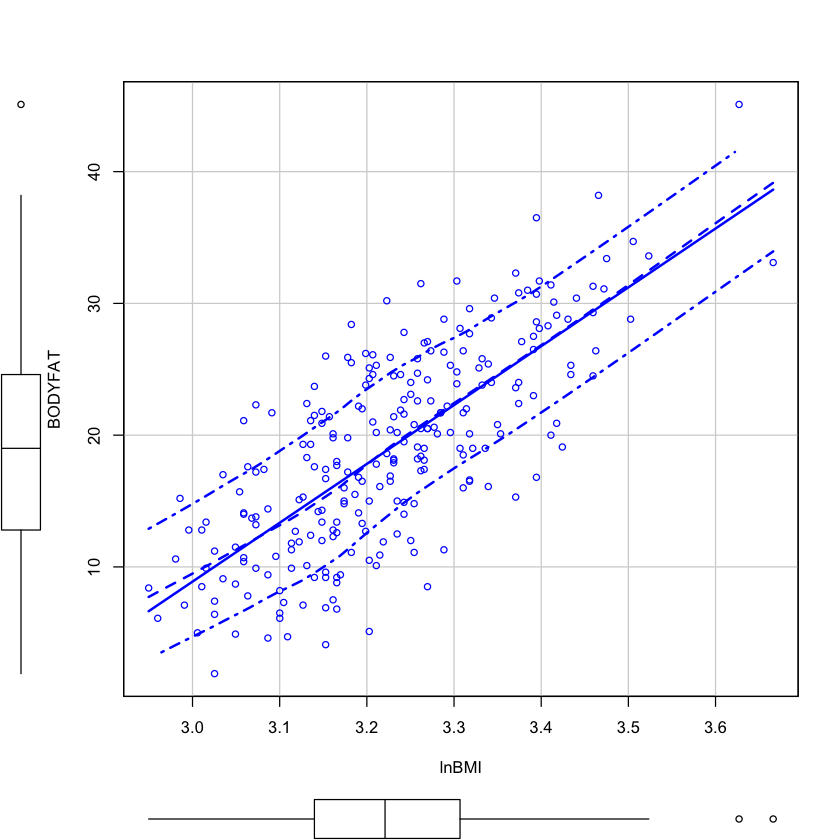

In [194]:
fatnew$lnBMI = log(fatnew$ADIPOSITY, base = exp(1))
scatterplot(fatnew$ADIPOSITY,fatnew$BODYFAT, xlab = 'BMI', ylab = 'BODYFAT')
scatterplot(fatnew$lnBMI,fatnew$BODYFAT, xlab = 'lnBMI', ylab = 'BODYFAT')

From the scatter plot of $BMI$ and $lnBMI$, we can find linear relation between $BODYFAT$ and $lnBMI$ is much better. 

Then, we need to test whether $lnBMI$ can explain $ABDOMEN$ well.

In [195]:
lm1 = lm(ABDOMEN~lnBMI, data = fatnew)
summary(lm1)


Call:
lm(formula = ABDOMEN ~ lnBMI, data = fatnew)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1186  -2.8416   0.1658   3.1393  10.1363 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -142.536      6.625  -21.52   <2e-16 ***
lnBMI         72.845      2.052   35.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.117 on 248 degrees of freedom
Multiple R-squared:  0.8355,	Adjusted R-squared:  0.8349 
F-statistic:  1260 on 1 and 248 DF,  p-value: < 2.2e-16


We can see $R^2$ statistics is $0.8355$, which means $lnBMI$ can explain most information of $ABDOMEN$. So $lnBMI$ is great!
And we know $BMI = \frac{WEIGHT}{HEIGHT^2}$. Thus, for reducing approximation error, we use $WEIGHT$ and $HEIGHT$ to construct a linear model.

In [196]:
fatnew$lnWEIGHT = log(fatnew$WEIGHT/2.204623, exp(1))
fatnew$lnHEIGHT = 2*log(fatnew$HEIGHT/0.3937008, exp(1))
fit_lnbmi = lm(BODYFAT ~ lnWEIGHT + lnHEIGHT, data = fatnew)
summary(fit_lnbmi)


Call:
lm(formula = BODYFAT ~ lnWEIGHT + lnHEIGHT, data = fatnew)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1396  -3.4080   0.1672   3.8969  11.9231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  347.724     48.028   7.240 5.67e-12 ***
lnWEIGHT      44.439      2.532  17.554  < 2e-16 ***
lnHEIGHT     -50.491      5.096  -9.908  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.107 on 247 degrees of freedom
Multiple R-squared:  0.5558,	Adjusted R-squared:  0.5522 
F-statistic: 154.5 on 2 and 247 DF,  p-value: < 2.2e-16


The $R^2$ is $0.5558$, which is not bad under only one variable. So we get the model, $$BODYFAT \sim ln(WEIGHT) + ln(HEIGHT^2)$$
Next, we check the model assumption. 

## Check Model Assumptions

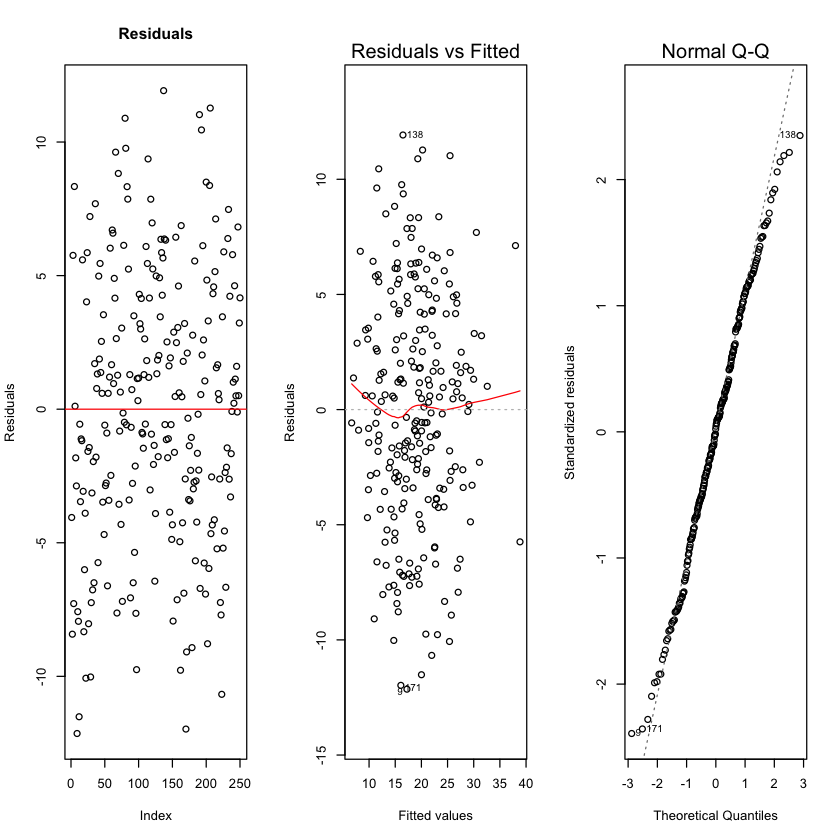

In [197]:
par(mfrow=c(1,3))
plot(residuals(fit_lnbmi),main="Residuals",ylab="Residuals")
abline(h=0,col="red")
plot(fit_lnbmi, which= c(1,2))

From the plot shown above, for Resudals vs Index plot both of them are patternless and therefore satisfy the independence. For Residuals vs Fitted plot, the vertical distance from the points to x axis are both nearly constant and patternless and therefore satisfying the homoscedasticity. For the $Normal~Q-Q~plot$ the residual points of both models are almost in a line and thus the normality assumption should not be violated. 

## Models Evaluation

Here, we get two models, 
\begin{align*}
    &Model A：BODYFAT \sim WEIGHT + ABDOMEN\\
    &Model B：BODYFAT \sim ln(WEIGHT) + ln(HEIGHT^2) 
\end{align*}
We know $Model~B$ is easier than $Model~A$, and we need to test whether these two models are useful compared to the real model.
We use official $US~Army~bodyfat~percentage$ calculator to evaluate models under the same data.

In [198]:
fatnew$abfp = 86.010 * log((fatnew$ABDOMEN*0.394-fatnew$NECK*0.394), 10)-70.041*log(fatnew$HEIGHT, 10) + 36.76

In [199]:
sum = 0
sum1 = 0
sum2 = 0
for(i in 1:nrow(fatnew)){
  sum = sum + sum(min(abs(fatnew$abfp[i]-fatnew$BODYFAT[i])))
  test_bic = predict(fit_bic, fatnew)
  test_lnbmi = predict(fit_lnbmi, fatnew)
  sum1 = sum1 + sum(abs(fatnew$BODYFAT[i]-test_bic[i]))
  sum2 = sum2 + sum(abs(fatnew$BODYFAT[i]-test_lnbmi[i]))
}
cat("ABFP Model:", sum / 250, "\n")
cat("Model A: BODYFAT ~ WEIGHT + ABDOMEN:", sum1 / 250, "\n")
cat("Model B: BODYFAT ~ ln(WEIGHT) + ln(HEIGHT^2):", sum2 / 250, "\n")

ABFP Model: 3.878458 
Model A: BODYFAT ~ WEIGHT + ABDOMEN: 3.292001 
Model B: BODYFAT ~ ln(WEIGHT) + ln(HEIGHT^2): 4.142432 


We use Mean absolute error to test three models. From the result, we can find that model $A$ and $B$ perform well under acceptable error. Especially, model A perform signficantly better than others. 

## Summary
From the analysis above, we decide these three variables: $WEIGHT$, $HEIGHT$ and $ABDOMEN$. 

Under the consideration of convenience, we will use model $Model~B: BODYFAT=347.72+44.44 ln(WEIGHT) -50.49 ln(HEIGHT^2)+ \epsilon$, where $\epsilon \sim N(0,σ^2 )$. And if we want a more accruate result, we will use $Model~A: BODYFAT= -42.5-0.12WEIGHT+0.90ABDOMEN+ \epsilon$, where $\epsilon \sim N(0,σ^2 )$.

For $Model~A$, the mean change in BODYFAT will be $0.12%$ per pound change in $WEIGHT$,will be  $0.9%$ change per cm change in $ABDOMEN$, holding each other predictor fixed. For $Model~B$, the mean $BODYFAT$ will be $44.439%$ change per exponential pound unit change in $WEIGHT$, will be $50.491*2%$ change per exponential cm unit change in height.